<a href="https://colab.research.google.com/github/Mini1521/Sentiment-Analysis/blob/main/Using_Microsoft_and_Tesla_Dataset_from_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Data- preprocessing

In [1]:
import pandas as pd

# Load the two CSV files
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/Company.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/CompanyValues.csv")

# Merge the data on a common column (e.g., 'day_date')
merged_df = pd.merge(df1, df2, on="ticker_symbol", how="left")  # Use "outer", "left", or "right" if needed

# Save the merged dataset to a new CSV file
merged_df.to_csv("merged_data.csv", index=False)

print("Merged CSV saved as 'merged_data.csv'")

Merged CSV saved as 'merged_data.csv'


In [2]:
import pandas as pd

# Load the dataset (update the filename if needed)
df = pd.read_csv('/content/merged_data.csv')

df.rename(columns={'post_date': 'date'}, inplace=True)

# Convert 'day_date' to datetime format
df['day_date'] = pd.to_datetime(df['day_date'], errors='coerce')

# Filter data for the year 2020
df_2019 = df[df['day_date'].dt.year == 2019]
df_2019 = df_2019.sort_values(by='day_date', ascending=True)

# Separate data for Microsoft (MSFT) and Tesla (TSLA)
msft_data = df_2019[df_2019['ticker_symbol'] == 'MSFT']
tsla_data = df_2019[df_2019['ticker_symbol'] == 'TSLA']

# Drop rows with missing values
msft_data = msft_data.dropna()
tsla_data = tsla_data.dropna()


# print(" Stock Data Date Range:")
# print(f"Start Date: {msft_data['day_date'].min()} | End Date: {msft_data['day_date'].max()}")
# print(f"Start Date: {tsla_data['day_date'].min()} | End Date: {tsla_data['day_date'].max()}")

# Save each dataset separately
msft_data.to_csv("msft_2019.csv", index=False)
tsla_data.to_csv("tsla_2019.csv", index=False)

print("Data preprocessing complete.")
print("Saved: 'msft_2019.csv' and 'tsla_2019.csv'")


Data preprocessing complete.
Saved: 'msft_2019.csv' and 'tsla_2019.csv'


# Social Media - preprocessing

In [3]:
import numpy as np
import pandas as pd

# Load datasets
company_tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/Company_Tweet.csv")
tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/Tweet.csv")

# Merge tweets with company information
tweets = tweets.merge(company_tweets, how='left', on='tweet_id')

In [4]:
# Convert 'post_date' to datetime format
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets['date'] = pd.to_datetime(tweets['date'], errors='coerce')
# tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time

tweets.to_csv("merged_tweets.csv", index=False)

tweets.drop(columns=['comment_num', 'retweet_num', 'like_num'], inplace=True)

In [5]:
# Filter for Microsoft (MSFT) and Tesla (TSLA)
tweets_filtered = tweets[tweets['ticker_symbol'].isin(['MSFT', 'TSLA'])]

# Keep only tweets from 2019
tweets_filtered = tweets_filtered[tweets_filtered['date'].dt.year == 2019]

# Split into separate datasets
msft_tweets = tweets_filtered[tweets_filtered['ticker_symbol'] == 'MSFT']
tsla_tweets = tweets_filtered[tweets_filtered['ticker_symbol'] == 'TSLA']

# Save to CSV files
msft_tweets.to_csv("msft_tweets_2019.csv", index=False)
tsla_tweets.to_csv("tsla_tweets_2019.csv", index=False)

# Cleaning of microsoft tweets

In [6]:
import re
import pandas as pd
import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load Twitter dataset
tweets_df = pd.read_csv("/content/msft_tweets_2019.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
# rename columns
tweets_df.rename(columns={'body': 'Tweet'}, inplace=True)
tweets_df.rename(columns={'post_date': 'day_date'}, inplace=True)

# Droping Duplicates
tweets_df.drop_duplicates(subset=['Tweet'], inplace=True)

# Handle Missing Values
tweets_df.dropna(subset=['Tweet'], inplace=True)  # Drop rows where 'Tweet' is empty

# Ensure 'date' is in datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

tweets_df = tweets_df.sort_values(by='date', ascending=True)

In [8]:
# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)


In [9]:
# Apply cleaning function
tweets_df['cleaned_tweet'] = tweets_df['Tweet'].astype(str).apply(clean_text)

#Saving the cleaned data for further analysis
tweets_df.to_csv("cleaned_msft_tweets.csv", index=False)

# Cleaning of tesla tweets

In [10]:
# Load Twitter dataset
tweets_df = pd.read_csv("/content/tsla_tweets_2019.csv")

In [11]:
# rename columns
tweets_df.rename(columns={'body': 'Tweet'}, inplace=True)
tweets_df.rename(columns={'post_date': 'day_date'}, inplace=True)

# Droping Duplicates
tweets_df.drop_duplicates(subset=['Tweet'], inplace=True)

# Handle Missing Values
tweets_df.dropna(subset=['Tweet'], inplace=True)  # Drop rows where 'Tweet' is empty

In [12]:
# Ensure 'date' is in datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')

tweets_df = tweets_df.sort_values(by='date', ascending=True)

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

In [14]:
# Apply cleaning function
tweets_df['cleaned_tweet'] = tweets_df['Tweet'].astype(str).apply(clean_text)

#Saving the cleaned data for further analysis
tweets_df.to_csv("cleaned_tsla_tweets.csv", index=False)

# Microsoft Articles - Preprocessing

In [15]:
import re
import pandas as pd
import string
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Load the dataset (Update the filename if needed)
article = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/msft_articles.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Convert 'date' column to datetime format
article['date'] = pd.to_datetime(article['date'], errors='coerce')

# Filter for only the year 2020
year_2020 = article[article['date'].dt.year == 2020]
year_2020 = year_2020.sort_values(by='date', ascending=True)

# Drop rows with missing values
year_2020 = year_2020.dropna()

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

In [18]:
# Apply text cleaning to the 'text' column
year_2020['text'] = year_2020['text'].astype(str).apply(clean_text)

# Save the cleaned dataset
year_2020.to_csv("cleaned_msft_articles.csv", index=False)

# Tesla Articles - Preprocessing

In [19]:
# Load the dataset (Update the filename if needed)
article = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/OG - Datasets/tsla_articles.csv')

In [20]:
# Convert 'date' column to datetime format
article['date'] = pd.to_datetime(article['date'], errors='coerce')

# Filter for only the year 2020
year_2020 = article[article['date'].dt.year == 2020]
year_2020 = year_2020.sort_values(by='date', ascending=True)

# Drop rows with missing values
year_2020 = year_2020.dropna()

In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)

In [22]:
# Apply text cleaning to the 'text' column
year_2020['text'] = year_2020['text'].astype(str).apply(clean_text)

# Save the cleaned dataset
year_2020.to_csv("cleaned_tsla_articles.csv", index=False)

# Sentiment Analysis- microsoft

In [23]:
!pip install textblob

In [24]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load datasets
tweets_df = pd.read_csv("/content/cleaned_msft_tweets.csv")
news_df = pd.read_csv("/content/cleaned_msft_articles.csv")

# Ensure text column is string type
tweets_df['Tweet'] = tweets_df['Tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)

In [25]:
# VADER Sentiment Analysis for Tweets
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score from VADER
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply VADER sentiment analysis to tweets
tweets_df['sentiment'] = tweets_df['Tweet'].apply(get_vader_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [26]:
# TextBlob Sentiment Analysis for News

# Function to get sentiment score from TextBlob
def get_textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply TextBlob sentiment analysis to news articles
news_df['sentiment'] = news_df['text'].apply(get_textblob_sentiment)

# Save sentiment-labeled datasets
tweets_df.to_csv("sentiment_msft_tweets.csv", index=False)
news_df.to_csv("sentiment_msft_news.csv", index=False)

print("Sentiment analysis complete! Results saved.")

Sentiment analysis complete! Results saved.


# Using Traditional ML methods for sentiment Analysis -MSFT

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed datasets
tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_df = pd.read_csv("/content/sentiment_msft_news.csv")

# Train-test split for Tweets
X_tweets, X_test_tweets, y_tweets, y_test_tweets = train_test_split(
    tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2, random_state=42
)

# Train-test split for News
X_news, X_test_news, y_news, y_test_news = train_test_split(
    news_df['text'], news_df['sentiment'], test_size=0.2, random_state=42
)

# Function to train models
def train_model(X_train, y_train, X_test, y_test, model):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {model.__class__.__name__} Accuracy: {accuracy:.4f}")
    return pipeline

# Models to Train
models = {
    'Naïve Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train models for Tweets
print("\n Training Models for Tweet Sentiment Classification ")
trained_models_tweets = {
    name: train_model(X_tweets, y_tweets, X_test_tweets, y_test_tweets, model)
    for name, model in models.items()
}

# Train models for News
print("\n Training Models for News Sentiment Classification ")
trained_models_news = {
    name: train_model(X_news, y_news, X_test_news, y_test_news, model)
    for name, model in models.items()
}


 Training Models for Tweet Sentiment Classification 
Model MultinomialNB Accuracy: 0.7534
Model SVC Accuracy: 0.8918
Model DecisionTreeClassifier Accuracy: 0.8016
Model RandomForestClassifier Accuracy: 0.8549

 Training Models for News Sentiment Classification 
Model MultinomialNB Accuracy: 0.6032
Model SVC Accuracy: 0.6032
Model DecisionTreeClassifier Accuracy: 0.4286
Model RandomForestClassifier Accuracy: 0.5238


Training Models for Tweet Sentiment Classification
* Model MultinomialNB Accuracy: 0.7532
* Model SVC Accuracy: 0.8911
* Model DecisionTreeClassifier Accuracy: 0.8057
* Model RandomForestClassifier Accuracy: 0.8523

Training Models for News Sentiment Classification
* Model MultinomialNB Accuracy: 0.6032
* Model SVC Accuracy: 0.6032
* Model DecisionTreeClassifier Accuracy: 0.4762
* Model RandomForestClassifier Accuracy: 0.5397



# Using ANN for Sentiment Analysis - MSFT

In [31]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00


In [32]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

# Load preprocessed datasets
tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_df = pd.read_csv("/content/sentiment_msft_news.csv")

# Train-test split for Tweets
X_tweets, X_test_tweets, y_tweets, y_test_tweets = train_test_split(tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2, random_state=42)

# Train-test split for News
X_news, X_test_news, y_news, y_test_news = train_test_split(news_df['text'], news_df['sentiment'], test_size=0.2, random_state=42)

# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_tweets = vectorizer.fit_transform(X_tweets).toarray()
X_test_tweets = vectorizer.transform(X_test_tweets).toarray()
X_news = vectorizer.fit_transform(X_news).toarray()
X_test_news = vectorizer.transform(X_test_news).toarray()

# Build ANN model
def build_ann(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Convert Sentiment Labels into One-Hot Encoding
y_tweets = to_categorical(y_tweets, num_classes=3)
y_test_tweets = to_categorical(y_test_tweets, num_classes=3)
y_news = to_categorical(y_news, num_classes=3)
y_test_news = to_categorical(y_test_news, num_classes=3)

# Train ANN model
print("\n Training ANN Model for Tweets Sentiment Classification ")
ann_tweet_model = build_ann(X_tweets.shape[1])
ann_tweet_model.fit(X_tweets, y_tweets, epochs=10, batch_size=32, validation_data=(X_test_tweets, y_test_tweets))

# Train ANN for News
print("\n Training ANN Model for News Sentiment Classification ")
ann_news_model = build_ann(X_news.shape[1])
ann_news_model.fit(X_news, y_news, epochs=10, batch_size=32, validation_data=(X_test_news, y_test_news))


y_test_tweets_labels = np.argmax(y_test_tweets, axis=1)
y_pred_tweets = ann_tweet_model.predict(X_test_tweets)
y_pred_tweets = np.argmax(y_pred_tweets, axis=1)  # Convert probabilities to class labels
print(" ANN Tweet Sentiment Classification Report:")   #  ANN Evaluation for Tweets
print(classification_report(y_test_tweets_labels, y_pred_tweets))
print(confusion_matrix(y_test_tweets_labels, y_pred_tweets))

y_test_news_labels = np.argmax(y_test_news, axis=1)
y_pred_news = ann_news_model.predict(X_test_news)
y_pred_news = np.argmax(y_pred_news, axis=1)  # Convert probabilities to class labels
print("\n ANN News Sentiment Classification Report:")  # ANN Evaluation for News
print(classification_report(y_test_news_labels, y_pred_news))
print(confusion_matrix(y_test_news_labels, y_pred_news))



 Training ANN Model for Tweets Sentiment Classification 
Epoch 1/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7264 - loss: 0.6543 - val_accuracy: 0.8784 - val_loss: 0.3599
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9088 - loss: 0.2768 - val_accuracy: 0.8858 - val_loss: 0.3467
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9352 - loss: 0.1985 - val_accuracy: 0.8887 - val_loss: 0.3520
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9520 - loss: 0.1437 - val_accuracy: 0.8874 - val_loss: 0.3909
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9701 - loss: 0.0932 - val_accuracy: 0.8856 - val_loss: 0.4454
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9822 - loss: 0.0581 - val_accuracy: 0.8888 - val_loss: 0.4855
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9860 - loss: 0.0441 - val_accuracy: 0.8870 - val_loss: 0.5910
Epoch 8/10
1438/14

# Using LSTM for Sentiment Analysis - MSFT

In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load the preprocessed datasets for tweets and news
tweets_df = pd.read_csv('/content/sentiment_msft_tweets.csv')
news_df = pd.read_csv('/content/sentiment_msft_news.csv')

# Replace NaN values with an empty string in both tweet and news data
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].fillna('')
news_df['text'] = news_df['text'].fillna('')

tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)



encoder = LabelEncoder()     # Encoding Sentiment Labels (assuming 'sentiment' column with Positive, Negative, Neutral)
tweets_df['encoded_sentiment'] = encoder.fit_transform(tweets_df['sentiment'])
news_df['encoded_sentiment'] = encoder.fit_transform(news_df['sentiment'])

y_tweets = tweets_df['encoded_sentiment']
y_news = news_df['encoded_sentiment']

# Tokenizing the Text Data (using preprocessed text column)
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(tweets_df['cleaned_tweet'])
X_tweets = tokenizer.texts_to_sequences(tweets_df['cleaned_tweet'])
X_tweets = pad_sequences(X_tweets, maxlen=100)

tokenizer.fit_on_texts(news_df['text'])
X_news = tokenizer.texts_to_sequences(news_df['text'])
X_news = pad_sequences(X_news, maxlen=100)

# Step 6: Splitting Data into Training and Testing Sets
X_train_tweets, X_test_tweets, y_train_tweets, y_test_tweets = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=42)
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(X_news, y_news, test_size=0.2, random_state=42)

# Building LSTM Model
tweet_model = Sequential()
tweet_model.add(Embedding(input_dim=5000, output_dim=128))
tweet_model.add(SpatialDropout1D(0.2))
tweet_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
tweet_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

tweet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
tweet_history = tweet_model.fit(X_train_tweets, y_train_tweets, epochs=5, batch_size=64, validation_data=(X_test_tweets, y_test_tweets), verbose=2)

# Building LSTM Model for News Sentiment Classification
news_model = Sequential()
news_model.add(Embedding(input_dim=5000, output_dim=128))
news_model.add(SpatialDropout1D(0.2))
news_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
news_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

news_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
news_history = news_model.fit(X_train_news, y_train_news, epochs=5, batch_size=64, validation_data=(X_test_news, y_test_news), verbose=2)


y_pred_tweets = tweet_model.predict(X_test_tweets) # Evaluate Tweets Model
y_pred_tweets = np.argmax(y_pred_tweets, axis=1)

y_pred_news = news_model.predict(X_test_news)      # Evaluate News Model
y_pred_news = np.argmax(y_pred_news, axis=1)

print("Tweets Sentiment Classification Report:")
print(classification_report(y_test_tweets, y_pred_tweets))
print(confusion_matrix(y_test_tweets, y_pred_tweets))


print("News Sentiment Classification Report:")
print(classification_report(y_test_news, y_pred_news))
print(confusion_matrix(y_test_news, y_pred_news))

Epoch 1/5
719/719 - 134s - 186ms/step - accuracy: 0.7902 - loss: 0.5489 - val_accuracy: 0.8879 - val_loss: 0.3484
Epoch 2/5
719/719 - 127s - 177ms/step - accuracy: 0.9023 - loss: 0.3049 - val_accuracy: 0.9043 - val_loss: 0.3127
Epoch 3/5
719/719 - 127s - 177ms/step - accuracy: 0.9156 - loss: 0.2673 - val_accuracy: 0.9071 - val_loss: 0.3067
Epoch 4/5
719/719 - 127s - 177ms/step - accuracy: 0.9234 - loss: 0.2420 - val_accuracy: 0.9039 - val_loss: 0.3117
Epoch 5/5
719/719 - 128s - 178ms/step - accuracy: 0.9284 - loss: 0.2222 - val_accuracy: 0.9050 - val_loss: 0.3173
Epoch 1/5
4/4 - 5s - 1s/step - accuracy: 0.4520 - loss: 1.0919 - val_accuracy: 0.5873 - val_loss: 1.0648
Epoch 2/5
4/4 - 1s - 199ms/step - accuracy: 0.4920 - loss: 1.0580 - val_accuracy: 0.5873 - val_loss: 1.0028
Epoch 3/5
4/4 - 1s - 195ms/step - accuracy: 0.4920 - loss: 1.0351 - val_accuracy: 0.5873 - val_loss: 0.9999
Epoch 4/5
4/4 - 1s - 195ms/step - accuracy: 0.4920 - loss: 1.0081 - val_accuracy: 0.5873 - val_loss: 1.0023
E

360/360 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step
Tweets Sentiment Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1522
           1       0.92      0.94      0.93      4818
           2       0.91      0.93      0.92      5160

    accuracy                           0.90     11500
   macro avg       0.88      0.85      0.87     11500
weighted avg       0.90      0.90      0.90     11500

[[1038  206  278]
 [  89 4546  183]
 [ 148  189 4823]]
News Sentiment Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        17
           2       0.59      1.00      0.74        37

    accuracy                           0.59        63
   macro avg       0.20      0.33      0.25        63
weighted avg       0.34      0.59      0.43        63

[[ 0  0  9]
 [ 0  0 17]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**wait time for compiling is almost 30 mins**

Epoch 1/5

719/719 - 171s - loss: 0.5244 - accuracy: 0.8012 - val_loss: 0.3485 - val_accuracy: 0.8920 - 171s/epoch - 238ms/step

Epoch 2/5

719/719 - 167s - loss: 0.3019 - accuracy: 0.9046 - val_loss: 0.3127 - val_accuracy: 0.9043 - 167s/epoch - 232ms/step

Epoch 3/5

719/719 - 167s - loss: 0.2631 - accuracy: 0.9160 - val_loss: 0.3165 - val_accuracy: 0.9011 - 167s/epoch - 232ms/step

Epoch 4/5

719/719 - 166s - loss: 0.2374 - accuracy: 0.9238 - val_loss: 0.3271 - val_accuracy: 0.9006 - 166s/epoch - 231ms/step

Epoch 5/5

719/719 - 169s - loss: 0.2134 - accuracy: 0.9310 - val_loss: 0.3373 - val_accuracy: 0.9060 - 169s/epoch - 235ms/step

Epoch 1/5

4/4 - 4s - loss: 1.0942 - accuracy: 0.4520 - val_loss: 1.0805 - val_accuracy: 0.5873 - 4s/epoch - 1s/step

Epoch 2/5

4/4 - 1s - loss: 1.0685 - accuracy: 0.4920 - val_loss: 1.0473 - val_accuracy: 0.5873 - 988ms/epoch - 247ms/step

Epoch 3/5

4/4 - 1s - loss: 1.0333 - accuracy: 0.4920 - val_loss: 0.9976 - val_accuracy: 0.5873 - 947ms/epoch - 237ms/step

Epoch 4/5

4/4 - 1s - loss: 1.0035 - accuracy: 0.4920 - val_loss: 0.9927 - val_accuracy: 0.5873 - 946ms/epoch - 236ms/step

Epoch 5/5

4/4 - 1s - loss: 0.9696 - accuracy: 0.4920 - val_loss: 0.9814 - val_accuracy: 0.5873 - 923ms/epoch - 231ms/step

360/360 [==============================] - 9s 24ms/step

2/2 [==============================] - 0s 16ms/step

Tweets Sentiment Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.64      0.74      1522
           1       0.91      0.96      0.93      4818
           2       0.91      0.94      0.92      5160

    accuracy                           0.91     11500

   macro avg       0.89      0.85      0.86     11500

weighted avg       0.90      0.91      0.90     11500


[[ 979  222  321]

 [  62 4605  151]

 [  97  228 4835]]

News Sentiment Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        17
           2       0.59      1.00      0.74        37

    accuracy                           0.59        63

   macro avg       0.20      0.33      0.25        63

weighted avg       0.34      0.59      0.43        63


[[ 0  0  9]

 [ 0  0 17]

 [ 0  0 37]]

# Using AdaBoost for Sentiment Analysis - MSFT


**RE-RUN THIS CODE**

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load Data
tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_df = pd.read_csv("/content/sentiment_msft_news.csv")

# Replace -1 with 0 (assuming -1 represents negative sentiment)
tweets_df['sentiment'] = tweets_df['sentiment'].replace(-1, 0)
news_df['sentiment'] = news_df['sentiment'].replace(-1, 0)

# Convert text into TF-IDF vectors for tweets
vectorizer_tweets = TfidfVectorizer(max_features=5000)
X_tweets = vectorizer_tweets.fit_transform(tweets_df['cleaned_tweet'].fillna('')).toarray()
y_tweets = tweets_df['sentiment']

# Convert text into TF-IDF vectors for news
vectorizer_news = TfidfVectorizer(max_features=5000)
X_news = vectorizer_news.fit_transform(news_df['text'].fillna('')).toarray()
y_news = news_df['sentiment']

# Train-test split for tweets
X_train_tweets, X_test_tweets, y_train_tweets, y_test_tweets = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=42)

# Train-test split for news
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(X_news, y_news, test_size=0.2, random_state=42)

# AdaBoost Classifier with Decision Tree as base learner
adaboost_model_tweets = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.5, random_state=42)
adaboost_model_news = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.5, random_state=42)

# Train models
adaboost_model_tweets.fit(X_train_tweets, y_train_tweets)
adaboost_model_news.fit(X_train_news, y_train_news)

# Predictions
y_pred_tweets = adaboost_model_tweets.predict(X_test_tweets)
y_pred_news = adaboost_model_news.predict(X_test_news)

# Evaluation for tweets
print("AdaBoost Sentiment Analysis Performance (Tweets):")
print(classification_report(y_test_tweets, y_pred_tweets))
print("Accuracy:", accuracy_score(y_test_tweets, y_pred_tweets))

# Evaluation for news
print("AdaBoost Sentiment Analysis Performance (News):")
print(classification_report(y_test_news, y_pred_news))
print("Accuracy:", accuracy_score(y_test_news, y_pred_news))


AdaBoost Sentiment Analysis Performance (Tweets):
              precision    recall  f1-score   support

           0       0.63      0.98      0.76      6340
           1       0.91      0.29      0.44      5160

    accuracy                           0.67     11500
   macro avg       0.77      0.63      0.60     11500
weighted avg       0.75      0.67      0.62     11500

Accuracy: 0.6688695652173913
AdaBoost Sentiment Analysis Performance (News):
              precision    recall  f1-score   support

           0       0.47      0.85      0.60        26
           1       0.75      0.32      0.45        37

    accuracy                           0.54        63
   macro avg       0.61      0.59      0.53        63
weighted avg       0.63      0.54      0.51        63

Accuracy: 0.5396825396825397


In [37]:
# pip install transformers datasets torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.3/231.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.1/344.1 kB 23.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0


In [28]:
# import torch
# import pandas as pd
# from transformers import BertTokenizer, BertForSequenceClassification
# from torch.utils.data import DataLoader, Dataset
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # Load Data
# tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
# news_df = pd.read_csv("/content/sentiment_msft_news.csv")

# # Replace -1 with 0 (assuming -1 represents negative sentiment)
# tweets_df['sentiment'] = tweets_df['sentiment'].replace(-1, 0)
# news_df['sentiment'] = news_df['sentiment'].replace(-1, 0)

# # Train-test split for Tweets
# X_train_tweets, X_test_tweets, y_train_tweets, y_test_tweets = train_test_split(
#     tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2, random_state=42
# )

# # Train-test split for News
# X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(
#     news_df['text'], news_df['sentiment'], test_size=0.2, random_state=42
# )

# # Load Pretrained BERT Tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Convert Text to Tokenized Input
# class SentimentDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len=128):
#         self.texts = texts.tolist()
#         self.labels = labels.tolist()
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         encoding = self.tokenizer(self.texts[idx], padding='max_length', truncation=True, max_length=self.max_len, return_tensors="pt")
#         return {
#             'input_ids': encoding['input_ids'].squeeze(0),
#             'attention_mask': encoding['attention_mask'].squeeze(0),
#             'labels': torch.tensor(self.labels[idx], dtype=torch.long)
#         }

# # Convert Data into PyTorch Datasets
# train_dataset_tweets = SentimentDataset(X_train_tweets, y_train_tweets, tokenizer)
# test_dataset_tweets = SentimentDataset(X_test_tweets, y_test_tweets, tokenizer)

# train_dataset_news = SentimentDataset(X_train_news, y_train_news, tokenizer)
# test_dataset_news = SentimentDataset(X_test_news, y_test_news, tokenizer)

# # Dataloader
# train_loader_tweets = DataLoader(train_dataset_tweets, batch_size=16, shuffle=True)
# test_loader_tweets = DataLoader(test_dataset_tweets, batch_size=16)

# train_loader_news = DataLoader(train_dataset_news, batch_size=16, shuffle=True)
# test_loader_news = DataLoader(test_dataset_news, batch_size=16)

# # Load Pretrained BERT Model
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model_tweets = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)
# model_news = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)

# # Optimizer & Loss
# optimizer_tweets = torch.optim.AdamW(model_tweets.parameters(), lr=2e-5)
# optimizer_news = torch.optim.AdamW(model_news.parameters(), lr=2e-5)
# loss_fn = torch.nn.CrossEntropyLoss()

# # Training Function
# def train_model(model, train_loader, optimizer):
#     model.train()
#     for batch in train_loader:
#         input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
#         optimizer.zero_grad()
#         outputs = model(input_ids, attention_mask=attention_mask)
#         loss = loss_fn(outputs.logits, labels)
#         loss.backward()
#         optimizer.step()

# # Train for 3 epochs
# for epoch in range(3):
#     print(f"Epoch {epoch+1}/3")
#     train_model(model_tweets, train_loader_tweets, optimizer_tweets)
#     train_model(model_news, train_loader_news, optimizer_news)

# # Evaluation Function
# def evaluate_model(model, test_loader):
#     model.eval()
#     y_pred, y_true = [], []
#     for batch in test_loader:
#         input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
#         with torch.no_grad():
#             outputs = model(input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         y_pred.extend(torch.argmax(logits, axis=1).cpu().numpy())
#         y_true.extend(labels.cpu().numpy())
#     return y_true, y_pred

# # Evaluate Tweets Model
# y_true_tweets, y_pred_tweets = evaluate_model(model_tweets, test_loader_tweets)
# print("BERT Sentiment Analysis Performance (Tweets):")
# print(classification_report(y_true_tweets, y_pred_tweets))
# print("Accuracy:", accuracy_score(y_true_tweets, y_pred_tweets))

# # Evaluate News Model
# y_true_news, y_pred_news = evaluate_model(model_news, test_loader_news)
# print("\n BERT Sentiment Analysis Performance (News):")
# print(classification_report(y_true_news, y_pred_news))
# print("Accuracy:", accuracy_score(y_true_news, y_pred_news))


In [29]:
# print("Unique Sentiment Labels in Tweets:", y_train_tweets.unique())
# print("Unique Sentiment Labels in News:", y_train_news.unique())


# Sentiment Analysis- tesla

ALGORITHMS WORKS !!!

In [29]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load datasets
tweets_df = pd.read_csv("/content/cleaned_tsla_tweets.csv")
news_df = pd.read_csv("/content/cleaned_tsla_articles.csv")

# Ensure text column is string type
tweets_df['Tweet'] = tweets_df['Tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)

In [30]:
# VADER Sentiment Analysis for Tweets

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# Function to get sentiment score from VADER
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply VADER sentiment analysis to tweets
tweets_df['sentiment'] = tweets_df['Tweet'].apply(get_vader_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
# TextBlob Sentiment Analysis for News

# Function to get sentiment score from TextBlob
def get_textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    return 1 if score > 0 else (-1 if score < 0 else 0)

# Apply TextBlob sentiment analysis to news articles
news_df['sentiment'] = news_df['text'].apply(get_textblob_sentiment)
news_df['sentiment'] = news_df['sentiment'].astype(int)

# Save sentiment-labeled datasets
tweets_df.to_csv("sentiment_tsla_tweets.csv", index=False)
news_df.to_csv("sentiment_tsla_news.csv", index=False)

print("Sentiment analysis complete! Results saved.")

Sentiment analysis complete! Results saved.


# Using Traditional ML methods for sentiment analysis

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed datasets
tweets_df = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_df = pd.read_csv("/content/sentiment_msft_news.csv")

tweets_df = tweets_df.sample(min(10000, len(tweets_df)), random_state=42)

# Train-test split for Tweets
X_tweets, X_test_tweets, y_tweets, y_test_tweets = train_test_split(
    tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2, random_state=42
)

# Train-test split for News
X_news, X_test_news, y_news, y_test_news = train_test_split(
    news_df['text'], news_df['sentiment'], test_size=0.2, random_state=42
)

# Function to train models
def train_model(X_train, y_train, X_test, y_test, model):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {model.__class__.__name__} Accuracy: {accuracy:.4f}")
    return pipeline

# Models to Train
models = {
    'Naïve Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train models for Tweets
print("\n Training Models for Tweet Sentiment Classification ")
trained_models_tweets = {
    name: train_model(X_tweets, y_tweets, X_test_tweets, y_test_tweets, model)
    for name, model in models.items()
}

# Train models for News
print("\n Training Models for News Sentiment Classification ")
trained_models_news = {
    name: train_model(X_news, y_news, X_test_news, y_test_news, model)
    for name, model in models.items()
}



 Training Models for Tweet Sentiment Classification 
Model MultinomialNB Accuracy: 0.7215
Model SVC Accuracy: 0.8285
Model DecisionTreeClassifier Accuracy: 0.7805
Model RandomForestClassifier Accuracy: 0.7870

 Training Models for News Sentiment Classification 
Model MultinomialNB Accuracy: 0.6032
Model SVC Accuracy: 0.6032
Model DecisionTreeClassifier Accuracy: 0.4444
Model RandomForestClassifier Accuracy: 0.5238


Training Models for Tweet Sentiment Classification
*   Model MultinomialNB Accuracy: 0.7215
*   Model SVC Accuracy: 0.8285
*   Model DecisionTreeClassifier Accuracy: 0.7720
*   Model RandomForestClassifier Accuracy: 0.7880


Training Models for News Sentiment Classification
*   Model MultinomialNB Accuracy: 0.5873
*   Model SVC Accuracy: 0.5556
*   Model DecisionTreeClassifier Accuracy: 0.5397
*   Model RandomForestClassifier Accuracy: 0.5238


# Using ANN for Sentiment Analysis

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

# Load preprocessed datasets
tweets_df = pd.read_csv("/content/sentiment_tsla_tweets.csv")
news_df = pd.read_csv("/content/sentiment_tsla_news.csv")

# Replace NaN values with an empty string in both tweet and news data
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].fillna('')
news_df['text'] = news_df['text'].fillna('')

tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)

# Reduce dataset size to prevent memory overload
tweets_df = tweets_df.sample(min(50000, len(tweets_df)), random_state=42)

# Train-test split for Tweets
X_tweets, X_test_tweets, y_tweets, y_test_tweets = train_test_split(tweets_df['cleaned_tweet'], tweets_df['sentiment'], test_size=0.2, random_state=42)

# Train-test split for News
X_news, X_test_news, y_news, y_test_news = train_test_split(news_df['text'], news_df['sentiment'], test_size=0.2, random_state=42)

# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_tweets = vectorizer.fit_transform(X_tweets).toarray()
X_test_tweets = vectorizer.transform(X_test_tweets).toarray()
X_news = vectorizer.fit_transform(X_news).toarray()
X_test_news = vectorizer.transform(X_test_news).toarray()

# Build ANN model
def build_ann(input_dim):
    model = Sequential([
       Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Convert Sentiment Labels into One-Hot Encoding
y_tweets = to_categorical(y_tweets, num_classes=3)
y_test_tweets = to_categorical(y_test_tweets, num_classes=3)
y_news = to_categorical(y_news, num_classes=3)
y_test_news = to_categorical(y_test_news, num_classes=3)

# Train ANN model
print("\n Training ANN Model for Tweets Sentiment Classification ")
ann_tweet_model = build_ann(X_tweets.shape[1])
ann_tweet_model.fit(X_tweets, y_tweets, epochs=10, batch_size=32, validation_data=(X_test_tweets, y_test_tweets))

# Train ANN for News
print("\n Training ANN Model for News Sentiment Classification ")
ann_news_model = build_ann(X_news.shape[1])
ann_news_model.fit(X_news, y_news, epochs=10, batch_size=32, validation_data=(X_test_news, y_test_news))

y_test_tweets_labels = np.argmax(y_test_tweets, axis=1)
y_pred_tweets = ann_tweet_model.predict(X_test_tweets)
y_pred_tweets = np.argmax(y_pred_tweets, axis=1)  # Convert probabilities to class labels
print(" ANN Tweet Sentiment Classification Report:")   #  ANN Evaluation for Tweets
print(classification_report(y_test_tweets_labels, y_pred_tweets))
print(confusion_matrix(y_test_tweets_labels, y_pred_tweets))

y_test_news_labels = np.argmax(y_test_news, axis=1)
y_pred_news = ann_news_model.predict(X_test_news)
y_pred_news = np.argmax(y_pred_news, axis=1)  # Convert probabilities to class labels
print("\n ANN News Sentiment Classification Report:")  # ANN Evaluation for News
print(classification_report(y_test_news_labels, y_pred_news))
print(confusion_matrix(y_test_news_labels, y_pred_news))



 Training ANN Model for Tweets Sentiment Classification 
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5954 - loss: 0.8592 - val_accuracy: 0.8195 - val_loss: 0.5095
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8563 - loss: 0.4200 - val_accuracy: 0.8312 - val_loss: 0.4758
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8834 - loss: 0.3475 - val_accuracy: 0.8335 - val_loss: 0.4737
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8979 - loss: 0.3051 - val_accuracy: 0.8287 - val_loss: 0.4857
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9065 - loss: 0.2751 - val_accuracy: 0.8326 - val_loss: 0.5032
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9187 - loss: 0.2444 - val_accuracy: 0.8287 - val_loss: 0.5225
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9286 - loss: 0.2177 - val_accuracy: 0.8274 - val_loss: 0.5480
Epoch 8/10
1250/1250 ━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 ANN Tweet Sentiment Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3003
           1       0.85      0.83      0.84      4236
           2       0.76      0.74      0.75      2761

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

[[2659  167  177]
 [ 239 3534  463]
 [ 237  480 2044]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

 ANN News Sentiment Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.58      1.00      0.74        21
           2       0.00      0.00      0.00         4

    accuracy                           0.58        36
   macro avg       0.19      0.33      0.25        36
weighted avg       0.34      0.58      0.43        36

[[ 0 11  0]
 [ 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Using LSTM for sentiment analysis

**IT WORKS !!!!!**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load the preprocessed datasets for tweets and news
tweets_df = pd.read_csv('/content/sentiment_tsla_tweets.csv')  # replace with your actual dataset path
news_df = pd.read_csv('/content/sentiment_tsla_news.csv')  # replace with your actual news dataset path

# Replace NaN values with an empty string in both tweet and news data
tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].fillna('')
news_df['text'] = news_df['text'].fillna('')

tweets_df['cleaned_tweet'] = tweets_df['cleaned_tweet'].astype(str)
news_df['text'] = news_df['text'].astype(str)


# Encoding Sentiment Labels (assuming 'sentiment' column with Positive, Negative, Neutral)
encoder = LabelEncoder()
tweets_df['encoded_sentiment'] = encoder.fit_transform(tweets_df['sentiment'])
news_df['encoded_sentiment'] = encoder.fit_transform(news_df['sentiment'])

y_tweets = tweets_df['encoded_sentiment']
y_news = news_df['encoded_sentiment']

#Tokenizing the Text Data (using preprocessed 'cleaned_text')
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(tweets_df['cleaned_tweet'])
X_tweets = tokenizer.texts_to_sequences(tweets_df['cleaned_tweet'])
X_tweets = pad_sequences(X_tweets, maxlen=100)

tokenizer.fit_on_texts(news_df['text'])
X_news = tokenizer.texts_to_sequences(news_df['text'])
X_news = pad_sequences(X_news, maxlen=100)

#Splitting Data into Training and Testing Sets
X_train_tweets, X_test_tweets, y_train_tweets, y_test_tweets = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=42)
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(X_news, y_news, test_size=0.2, random_state=42)

#Building ANN Model for Tweets Sentiment Classification
tweet_model = Sequential()
tweet_model.add(Embedding(input_dim=5000, output_dim=128))
tweet_model.add(SpatialDropout1D(0.2))
tweet_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
tweet_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

tweet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
tweet_history = tweet_model.fit(X_train_tweets, y_train_tweets, epochs=5, batch_size=64, validation_data=(X_test_tweets, y_test_tweets), verbose=2)

#Building ANN Model for News Sentiment Classification
news_model = Sequential()
news_model.add(Embedding(input_dim=5000, output_dim=128))
news_model.add(SpatialDropout1D(0.2))
news_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
news_model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

news_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
news_history = news_model.fit(X_train_news, y_train_news, epochs=5, batch_size=64, validation_data=(X_test_news, y_test_news), verbose=2)

# Step 9: Evaluating the Models
# Evaluate Tweets Model
y_pred_tweets = tweet_model.predict(X_test_tweets)
y_pred_tweets = np.argmax(y_pred_tweets, axis=1)

# Evaluate News Model
y_pred_news = news_model.predict(X_test_news)
y_pred_news = np.argmax(y_pred_news, axis=1)

# Performance Metrics for Tweets
print("Tweets Sentiment Classification Report:")
print(classification_report(y_test_tweets, y_pred_tweets))
print(confusion_matrix(y_test_tweets, y_pred_tweets))

# Performance Metrics for News
print("News Sentiment Classification Report:")
print(classification_report(y_test_news, y_pred_news))
print(confusion_matrix(y_test_news, y_pred_news))

Epoch 1/5
4544/4544 - 1334s - 294ms/step - accuracy: 0.8483 - loss: 0.4363 - val_accuracy: 0.8775 - val_loss: 0.3774
Epoch 2/5
4544/4544 - 1355s - 298ms/step - accuracy: 0.8803 - loss: 0.3644 - val_accuracy: 0.8867 - val_loss: 0.3531
Epoch 3/5
4544/4544 - 1327s - 292ms/step - accuracy: 0.8886 - loss: 0.3426 - val_accuracy: 0.8871 - val_loss: 0.3518
Epoch 4/5
4544/4544 - 1308s - 288ms/step - accuracy: 0.8923 - loss: 0.3281 - val_accuracy: 0.8883 - val_loss: 0.3496
Epoch 5/5
4544/4544 - 1304s - 287ms/step - accuracy: 0.8953 - loss: 0.3164 - val_accuracy: 0.8855 - val_loss: 0.3578
Epoch 1/5
3/3 - 7s - 2s/step - accuracy: 0.4437 - loss: 1.0925 - val_accuracy: 0.5833 - val_loss: 1.0673
Epoch 2/5
3/3 - 1s - 446ms/step - accuracy: 0.5845 - loss: 1.0506 - val_accuracy: 0.5833 - val_loss: 1.0140
Epoch 3/5
3/3 - 1s - 474ms/step - accuracy: 0.5845 - loss: 0.9891 - val_accuracy: 0.5833 - val_loss: 0.9804
Epoch 4/5
3/3 - 2s - 695ms/step - accuracy: 0.5845 - loss: 0.9610 - val_accuracy: 0.5833 - val

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**WAIT TIME FOR COMPILING IS ALMOST 2 HOURS**

Epoch 1/5

4544/4544 - 1295s - 285ms/step - accuracy: 0.8476 - loss: 0.4395 - val_accuracy: 0.8785 - val_loss: 0.3745

Epoch 2/5

4544/4544 - 1354s - 298ms/step - accuracy: 0.8808 - loss: 0.3646 - val_accuracy: 0.8867 - val_loss: 0.3514

Epoch 3/5

4544/4544 - 1314s - 289ms/step - accuracy: 0.8887 - loss: 0.3425 - val_accuracy: 0.8873 - val_loss: 0.3500

Epoch 4/5

4544/4544 - 1305s - 287ms/step - accuracy: 0.8927 - loss: 0.3280 - val_accuracy: 0.8895 - val_loss: 0.3490

Epoch 5/5

4544/4544 - 1299s - 286ms/step - accuracy: 0.8956 - loss: 0.3159 - val_accuracy: 0.8879 - val_loss: 0.3549

Epoch 1/5

3/3 - 8s - 3s/step - accuracy: 0.3803 - loss: 1.0958 - val_accuracy: 0.5833 - val_loss: 1.0691

Epoch 2/5

3/3 - 1s - 377ms/step - accuracy: 0.5845 - loss: 1.0560 - val_accuracy: 0.5833 - val_loss: 1.0241

Epoch 3/5

3/3 - 1s - 254ms/step - accuracy: 0.5845 - loss: 0.9970 - val_accuracy: 0.5833 - val_loss: 0.9730

Epoch 4/5

3/3 - 1s - 395ms/step - accuracy: 0.5845 - loss: 0.9573 - val_accuracy: 0.5833 - val_loss: 0.9622

Epoch 5/5

3/3 - 1s - 434ms/step - accuracy: 0.5845 - loss: 0.9171 - val_accuracy: 0.5833 - val_loss: 0.9695

WARNING:tensorflow:5 out of the last 363 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x79ab5ee69300> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

2272/2272 ━━━━━━━━━━━━━━━━━━━━ 109s 48ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 470ms/step

Tweets Sentiment Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     20075
           1       0.89      0.94      0.91     21900
           2       0.90      0.90      0.90     30720

    accuracy                           0.89     72695

   macro avg       0.88      0.88      0.88     72695

weighted avg       0.89      0.89      0.89     72695


[[16164  1598  2313]

 [  571 20637   692]

 [ 1979   999 27742]]

News Sentiment Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        11
           2       0.58      1.00      0.74        21

    accuracy                           0.58        36
   macro avg       0.19      0.33      0.25        36

weighted avg       0.34      0.58      0.43        36

[[ 0  0  4]
 [ 0  0 11]
 [ 0  0 21]]


# Using AdaBoost for Sentiment Analysis - TSLA

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load Data
tweets_df = pd.read_csv("/content/sentiment_tsla_tweets.csv")
news_df = pd.read_csv("/content/sentiment_tsla_news.csv")

# Replace -1 with 0 (assuming -1 represents negative sentiment)
tweets_df['sentiment'] = tweets_df['sentiment'].replace(-1, 0)
news_df['sentiment'] = news_df['sentiment'].replace(-1, 0)

# Convert text into TF-IDF vectors for tweets
vectorizer_tweets = TfidfVectorizer(max_features=5000)
X_tweets = vectorizer_tweets.fit_transform(tweets_df['cleaned_tweet'].fillna('')).toarray()
y_tweets = tweets_df['sentiment']

# Convert text into TF-IDF vectors for news
vectorizer_news = TfidfVectorizer(max_features=5000)
X_news = vectorizer_news.fit_transform(news_df['text'].fillna('')).toarray()
y_news = news_df['sentiment']

#  Reduce Data Size (if crashing persists)
X_tweets, y_tweets = X_tweets[:20000], y_tweets[:20000]  # Limit to 10,000 samples


# Train-test split for tweets
X_train_tweets, X_test_tweets, y_train_tweets, y_test_tweets = train_test_split(X_tweets, y_tweets, test_size=0.2, random_state=42)

# Train-test split for news
X_train_news, X_test_news, y_train_news, y_test_news = train_test_split(X_news, y_news, test_size=0.2, random_state=42)

# AdaBoost Classifier with Decision Tree as base learner
adaboost_model_tweets = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.5, random_state=42)
adaboost_model_news = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.5, random_state=42)

# Train models
adaboost_model_tweets.fit(X_train_tweets, y_train_tweets)
adaboost_model_news.fit(X_train_news, y_train_news)

# Predictions
y_pred_tweets = adaboost_model_tweets.predict(X_test_tweets)
y_pred_news = adaboost_model_news.predict(X_test_news)

# Evaluation for tweets
print("AdaBoost Sentiment Analysis Performance (Tweets):")
print(classification_report(y_test_tweets, y_pred_tweets))
print("Accuracy:", accuracy_score(y_test_tweets, y_pred_tweets))

# Evaluation for news
print("AdaBoost Sentiment Analysis Performance (News):")
print(classification_report(y_test_news, y_pred_news))
print("Accuracy:", accuracy_score(y_test_news, y_pred_news))


AdaBoost Sentiment Analysis Performance (Tweets):
              precision    recall  f1-score   support

           0       0.60      0.98      0.74      2265
           1       0.84      0.15      0.25      1735

    accuracy                           0.62      4000
   macro avg       0.72      0.56      0.50      4000
weighted avg       0.70      0.62      0.53      4000

Accuracy: 0.61825
AdaBoost Sentiment Analysis Performance (News):
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.60      1.00      0.75        21

    accuracy                           0.61        36
   macro avg       0.80      0.53      0.44        36
weighted avg       0.77      0.61      0.49        36

Accuracy: 0.6111111111111112


# Merging - Microsoft


In [ ]:
import pandas as pd

# Load datasets
stock_data = pd.read_csv("/content/msft_2019.csv")
tweets_sentiment = pd.read_csv("/content/sentiment_msft_tweets.csv")
news_sentiment = pd.read_csv("/content/sentiment_msft_news.csv")

In [ ]:
# Convert date columns to datetime
stock_data['day_date'] = pd.to_datetime(stock_data['day_date'])
tweets_sentiment['date'] = pd.to_datetime(tweets_sentiment['date'])
news_sentiment['date'] = pd.to_datetime(news_sentiment['date'])

In [ ]:
# Extract Month-Day format (MM-DD)
stock_data['month_day'] = stock_data['day_date'].dt.strftime('%m-%d')
tweets_sentiment['month_day'] = tweets_sentiment['date'].dt.strftime('%m-%d')
news_sentiment['month_day'] = news_sentiment['date'].dt.strftime('%m-%d')

In [ ]:
# # Drop original 'date' columns (Optional)
# stock_data.drop(columns=['day_date'], inplace=True)
# tweets_sentiment.drop(columns=['date'], inplace=True)
# news_sentiment.drop(columns=['date'], inplace=True)

In [ ]:
# Stock & Tweets
stock_tweet_merged = stock_data.merge(tweets_sentiment, on='month_day', how='left')
stock_tweet_merged.fillna(0, inplace=True)
stock_tweet_merged = stock_tweet_merged.rename(columns={'sentiment_vader': 'tweet_sentiment'})
stock_tweet_merged.to_csv("Merge_MSFT_TWEET.csv", index=False)

In [ ]:
# Stock & News
stock_news_merged = stock_data.merge(news_sentiment, on='month_day', how='left')
stock_news_merged.fillna(0, inplace=True)
stock_news_merged = stock_news_merged.rename(columns={'sentiment': 'news_sentiment'})
stock_news_merged.to_csv("Merge_MSFT_NEWS.csv", index=False)

print(" Merging done! Two separate files created: one for Tweets, one for News.")

 Merging done! Two separate files created: one for Tweets, one for News.


<ipython-input-42-225be7571668>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  stock_news_merged.fillna(0, inplace=True)


# Merging - Tesla

In [ ]:
import pandas as pd

# Load datasets (assuming they are already preprocessed)
stock_data = pd.read_csv("/content/tsla_2019.csv")
tweets_sentiment = pd.read_csv("/content/sentiment_tsla_tweets.csv")
news_sentiment = pd.read_csv("/content/sentiment_tsla_news.csv")

In [ ]:
# Convert date columns to datetime
stock_data['day_date'] = pd.to_datetime(stock_data['day_date'])
tweets_sentiment['date'] = pd.to_datetime(tweets_sentiment['date'])
news_sentiment['date'] = pd.to_datetime(news_sentiment['date'])

In [ ]:
# Extract Month-Day format (MM-DD)
stock_data['month_day'] = stock_data['day_date'].dt.strftime('%m-%d')
tweets_sentiment['month_day'] = tweets_sentiment['date'].dt.strftime('%m-%d')
news_sentiment['month_day'] = news_sentiment['date'].dt.strftime('%m-%d')

In [ ]:
# Stock & Tweets
stock_tweet_merged = stock_data.merge(tweets_sentiment, on='month_day', how='left')
stock_tweet_merged.fillna(0, inplace=True)
stock_tweet_merged = stock_tweet_merged.rename(columns={'sentiment_vader': 'tweet_sentiment'})
stock_tweet_merged.to_csv("Merge_TSLA_TWEET.csv", index=False)

In [ ]:
# Stock & News
stock_news_merged = stock_data.merge(news_sentiment, on='month_day', how='left')
stock_news_merged.fillna(0, inplace=True)
stock_news_merged = stock_news_merged.rename(columns={'sentiment': 'news_sentiment'})
stock_news_merged.to_csv("Merge_TSLA_NEWS.csv", index=False)

print(" Merging done! Two separate files created: one for Tweets, one for News.")

 Merging done! Two separate files created: one for Tweets, one for News.


<ipython-input-47-df03a4931140>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  stock_news_merged.fillna(0, inplace=True)


# Stock Data Analysis (Microsoft)

In [ ]:
import pandas as pd
import numpy as np

# Load both datasets
stock_tweet = pd.read_csv("/content/Merge_MSFT_TWEET.csv")
stock_news = pd.read_csv("/content/Merge_MSFT_NEWS.csv")

# Convert 'month_day' to datetime format
stock_tweet['month_day'] = pd.to_datetime(stock_tweet['month_day'], format='%m-%d')
stock_news['month_day'] = pd.to_datetime(stock_news['month_day'], format='%m-%d')

# Sort data chronologically
stock_tweet = stock_tweet.sort_values('month_day')
stock_news = stock_news.sort_values('month_day')

# Feature Engineering
for df in [stock_tweet, stock_news]:
    df['5_day_avg'] = df['close_value'].rolling(window=5).mean()
    df['10_day_avg'] = df['close_value'].rolling(window=10).mean()
    df['volatility'] = df['close_value'].pct_change().rolling(window=5).std()
    df.fillna(0, inplace=True)  # Fill missing values

# Save new files
stock_tweet.to_csv("MSFT_FEATURED_TWEET.csv", index=False)
stock_news.to_csv("MSFT_FEATURED_NEWS.csv", index=False)

print(" Feature Engineering Completed for Both Files!")


 Feature Engineering Completed for Both Files!


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Tweet Data
tweet_data = pd.read_csv("/content/MSFT_FEATURED_TWEET.csv")

# Scale Features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tweet_data[['close_value', 'sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X, y = [], []
for i in range(30, len(scaled_data)):
    X.append(scaled_data[i-30:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Build LSTM Model
model_tweet = Sequential()
model_tweet.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_tweet.add(Dropout(0.2))
model_tweet.add(LSTM(units=50))
model_tweet.add(Dropout(0.2))
model_tweet.add(Dense(units=1))

model_tweet.compile(optimizer='adam', loss='mean_squared_error')
model_tweet.fit(X, y, epochs=10, batch_size=32)

# Save Model
model_tweet.save("LSTM_MSFT_TWEET.h5")

print(" LSTM Model Trained for Tweet Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - loss: 0.0074
Epoch 2/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - loss: 0.0011
Epoch 3/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - loss: 6.0460e-04
Epoch 4/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - loss: 4.7164e-04
Epoch 5/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - loss: 4.3132e-04
Epoch 6/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - loss: 4.1755e-04
Epoch 7/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - loss: 4.1286e-04
Epoch 8/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - loss: 4.0734e-04
Epoch 9/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - loss: 4.0394e-04
Epoch 10/10
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - loss: 4.0733e-04


 LSTM Model Trained for Tweet Sentiment!


**wait time for above compiling is almost 15 mins or so**

In [ ]:
# Load News Data
news_data = pd.read_csv("/content/MSFT_FEATURED_NEWS.csv")

# Scale Features
scaled_news_data = scaler.fit_transform(news_data[['close_value', 'news_sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X_news, y_news = [], []
for i in range(30, len(scaled_news_data)):
    X_news.append(scaled_news_data[i-30:i])
    y_news.append(scaled_news_data[i, 0])

X_news, y_news = np.array(X_news), np.array(y_news)

# Build LSTM Model
model_news = Sequential()
model_news.add(LSTM(units=50, return_sequences=True, input_shape=(X_news.shape[1], X_news.shape[2])))
model_news.add(Dropout(0.2))
model_news.add(LSTM(units=50))
model_news.add(Dropout(0.2))
model_news.add(Dense(units=1))

model_news.compile(optimizer='adam', loss='mean_squared_error')
model_news.fit(X_news, y_news, epochs=20, batch_size=32)

# Save Model
model_news.save("LSTM_MSFT_NEWS.h5")

print("✅ LSTM Model Trained for News Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0896
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0204
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0098
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0076
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0061
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0047
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0058
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0052
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0046
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0044
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0055
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0038
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0045
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0036
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0047
Epoc

✅ LSTM Model Trained for News Sentiment!


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
tweet_pred = model_tweet.predict(X)
news_pred = model_news.predict(X_news)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y, tweet_pred, "LSTM Tweet Model")
evaluate_model(y_news, news_pred, "LSTM News Model")
# y_pred = model_tweet.predict(X_test)  # Ensure model exists and has been trained

1796/1796 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
LSTM Tweet Model - MAE: 0.0111, RMSE: 0.0145
LSTM News Model - MAE: 0.0279, RMSE: 0.0346


# Stock Data Analysis (Tesla)

In [ ]:
import pandas as pd
import numpy as np

# Load both datasets
stock_tweet = pd.read_csv("/content/Merge_TSLA_TWEET.csv")
stock_news = pd.read_csv("/content/Merge_TSLA_NEWS.csv")

# Convert 'month_day' to datetime format
stock_tweet['month_day'] = pd.to_datetime(stock_tweet['month_day'], format='%m-%d')
stock_news['month_day'] = pd.to_datetime(stock_news['month_day'], format='%m-%d')

# Sort data chronologically
stock_tweet = stock_tweet.sort_values('month_day')
stock_news = stock_news.sort_values('month_day')

# Feature Engineering
for df in [stock_tweet, stock_news]:
    df['5_day_avg'] = df['close_value'].rolling(window=5).mean()
    df['10_day_avg'] = df['close_value'].rolling(window=10).mean()
    df['volatility'] = df['close_value'].pct_change().rolling(window=5).std()
    df.fillna(0, inplace=True)  # Fill missing values

# Save new files
stock_tweet.to_csv("TSLA_FEATURED_TWEET.csv", index=False)
stock_news.to_csv("TSLA_FEATURED_NEWS.csv", index=False)

print(" Feature Engineering Completed for Both Files!")


 Feature Engineering Completed for Both Files!


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Tweet Data
tweet_data = pd.read_csv("/content/TSLA_FEATURED_TWEET.csv")

# Scale Features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tweet_data[['close_value', 'sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X, y = [], []
for i in range(30, len(scaled_data)):
    X.append(scaled_data[i-30:i])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Build LSTM Model
model_tweet = Sequential()
model_tweet.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_tweet.add(Dropout(0.2))
model_tweet.add(LSTM(units=50))
model_tweet.add(Dropout(0.2))
model_tweet.add(Dense(units=1))

model_tweet.compile(optimizer='adam', loss='mean_squared_error')
model_tweet.fit(X, y, epochs=7, batch_size=32)

# Save Model
model_tweet.save("LSTM_TSLA_TWEET.h5")

print(" LSTM Model Trained for Tweet Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 374s 33ms/step - loss: 0.0015
Epoch 2/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 381s 32ms/step - loss: 3.1537e-04
Epoch 3/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 386s 33ms/step - loss: 3.0349e-04
Epoch 4/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 367s 32ms/step - loss: 2.9387e-04
Epoch 5/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 383s 32ms/step - loss: 2.8767e-04
Epoch 6/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 381s 32ms/step - loss: 2.8335e-04
Epoch 7/7
11358/11358 ━━━━━━━━━━━━━━━━━━━━ 388s 33ms/step - loss: 2.8066e-04


 LSTM Model Trained for Tweet Sentiment!


**wait time for above compiling is almost 45 mins**

In [ ]:
# Load News Data
news_data = pd.read_csv("/content/TSLA_FEATURED_NEWS.csv")

# Scale Features
scaled_news_data = scaler.fit_transform(news_data[['close_value', 'news_sentiment', '5_day_avg', '10_day_avg', 'volatility']])

# Prepare Data for LSTM
X_news, y_news = [], []
for i in range(30, len(scaled_news_data)):
    X_news.append(scaled_news_data[i-30:i])
    y_news.append(scaled_news_data[i, 0])

X_news, y_news = np.array(X_news), np.array(y_news)

# Build LSTM Model
model_news = Sequential()
model_news.add(LSTM(units=50, return_sequences=True, input_shape=(X_news.shape[1], X_news.shape[2])))
model_news.add(Dropout(0.2))
model_news.add(LSTM(units=50))
model_news.add(Dropout(0.2))
model_news.add(Dense(units=1))

model_news.compile(optimizer='adam', loss='mean_squared_error')
model_news.fit(X_news, y_news, epochs=25, batch_size=32)

# Save Model
model_news.save("LSTM_TSLA_NEWS.h5")

print("✅ LSTM Model Trained for News Sentiment!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0930
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0241
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0096
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0088
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0069
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0060
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0060
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0052
Epoch 9/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0059
Epoch 10/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0059
Epoch 11/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0048
Epoch 12/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0064
Epoch 13/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0060
Epoch 14/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0055
Epoch 15/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0055
Epoc

✅ LSTM Model Trained for News Sentiment!


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
tweet_pred = model_tweet.predict(X)
news_pred = model_news.predict(X_news)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

evaluate_model(y, tweet_pred, "LSTM Tweet Model")
evaluate_model(y_news, news_pred, "LSTM News Model")
# y_pred = model_tweet.predict(X_test)  # Ensure model exists and has been trained

11358/11358 ━━━━━━━━━━━━━━━━━━━━ 110s 10ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
LSTM Tweet Model - MAE: 0.0020, RMSE: 0.0028
LSTM News Model - MAE: 0.0345, RMSE: 0.0475


# Visualization

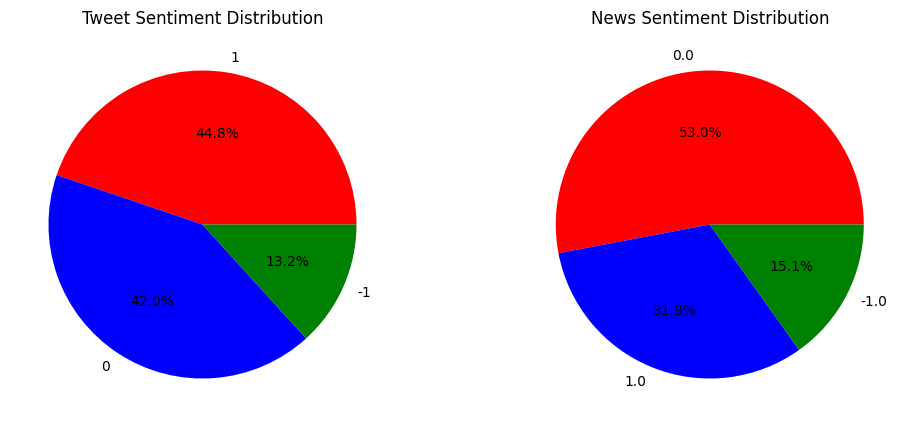

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Load sentiment datasets
# tweets_df = pd.read_csv("/content/Merge_MSFT_TWEET.csv")
# news_df = pd.read_csv("/content/Merge_MSFT_NEWS.csv")

# # 1️⃣ PIE CHART: Proportion of Sentiments
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# tweets_df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'blue', 'green'])
# plt.title("Tweet Sentiment Distribution")
# plt.ylabel("")

# plt.subplot(1, 2, 2)
# news_df['news_sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'blue', 'green'])
# plt.title("News Sentiment Distribution")
# plt.ylabel("")
# plt.show()



# # # 3️⃣ CONFUSION MATRIX: LSTM vs ANN
# # lstm_y_true = [...]  # Replace with actual y_test labels
# # lstm_y_pred = [...]  # Replace with LSTM predictions
# # ann_y_true = [...]  # Replace with actual y_test labels
# # ann_y_pred = [...]  # Replace with ANN predictions

# # fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# # for ax, y_true, y_pred, title in zip(axes, [lstm_y_true, ann_y_true], [lstm_y_pred, ann_y_pred], ["LSTM Model", "ANN Model"]):
# #     cm = confusion_matrix(y_true, y_pred)
# #     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# #     disp.plot(ax=ax, cmap='Blues')
# #     ax.set_title(title)
# # plt.show()




In [ ]:
# # 2️⃣ LINE PLOT: Stock Price vs. Sentiment
# stock_df = pd.read_csv("/content/Merge_MSFT_TWEET.csv")  # Ensure dataset has 'date', 'sentiment_score', 'stock_price'
# stock_df['date'] = pd.to_datetime(stock_df['date'])

# plt.figure(figsize=(12, 6))
# sns.lineplot(x=stock_df['date'], y=stock_df['sentiment'], label="Daily Sentiment Score", color='blue')
# sns.lineplot(x=stock_df['date'], y=stock_df['low_value'], label="Stock Price", color='green')
# plt.xticks(rotation=45)
# # plt.title("Stock Price vs. Sentiment Over Time")
# plt.legend()
# plt.show()

In [ ]:
# # 4️⃣ BAR CHART: Accuracy of Models
# models = ['Naïve Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'ANN', 'LSTM']
# accuracy_scores = [0.7532, 0.8911, 0.8110, 0.8534, 0.88, 0.90]  # Replace with actual accuracy values

# plt.figure(figsize=(10, 6))
# sns.barplot(x=models, y=accuracy_scores, palette='viridis')
# plt.ylim(0, 1)
# plt.title("Model Accuracy Comparison")
# plt.ylabel("Accuracy")
# plt.show()

NameError: name 'plt' is not defined